In [1]:
include("c:/Users/vikra/OneDrive/Desktop/project/src/QuantumDD/QuantumDD.jl")
cd("c:/Users/vikra/OneDrive/Desktop/project")
using Pkg
Pkg.activate(".")
using .QuantumDD, Plots, LsqFit, FFTW, QuantumToolbox

  Activating project at `c:\Users\vikra\OneDrive\Desktop\project`


## CPMG with 2 $\pi$-pulses vs FID under different noises

In [2]:
# Parameters
sequence = "CPMG"
T_max = 1.0
n_pi_pulses = 2
n_realizations = 1000
dt = 0.01
pulse_duration =  dt
σ = 0.2  # Standard deviation for Gaussian noise
pulse_shape = "square"  # or "gaussian"
# Make CPMG control terms
control_terms = make_control_terms(sequence, T_max, n_pi_pulses;
                                   pulse_duration=pulse_duration,
                                   shape=pulse_shape,
                                   axis=:x,
                                   pulse_amplitude=π,
                                   center_pulse=true)
ψ₀ = normalize(basis(2, 0) + basis(2, 1))

# Example white noise spectral density
parameters = get_preset_params("white")
S_func = ω -> S(ω; parameters...)

T_vals, avg_fid = simulate_shaped_control_fidelity(
    ψ₀ = ψ₀,
    T_max = T_max,
    dt = dt,
    target_std = σ,
    n_realizations = n_realizations,
    S_func_z = S_func,
)

# Actual simulation with control
T_vals_ctrl, avg_fid_ctrl = simulate_shaped_control_fidelity(
    ψ₀ = ψ₀,
    T_max = T_max,
    dt = dt,
    target_std = σ,
    n_realizations = n_realizations,
    S_func_z = S_func,
    control_terms = control_terms
    )


┌ Info: Realization 20 complete
└ @ Main.QuantumDD c:\Users\vikra\OneDrive\Desktop\project\src\QuantumDD\coherence.jl:260
┌ Info: Realization 40 complete
└ @ Main.QuantumDD c:\Users\vikra\OneDrive\Desktop\project\src\QuantumDD\coherence.jl:260
┌ Info: Realization 60 complete
└ @ Main.QuantumDD c:\Users\vikra\OneDrive\Desktop\project\src\QuantumDD\coherence.jl:260
┌ Info: Realization 80 complete
└ @ Main.QuantumDD c:\Users\vikra\OneDrive\Desktop\project\src\QuantumDD\coherence.jl:260
┌ Info: Realization 100 complete
└ @ Main.QuantumDD c:\Users\vikra\OneDrive\Desktop\project\src\QuantumDD\coherence.jl:260
┌ Info: Realization 120 complete
└ @ Main.QuantumDD c:\Users\vikra\OneDrive\Desktop\project\src\QuantumDD\coherence.jl:260
┌ Info: Realization 140 complete
└ @ Main.QuantumDD c:\Users\vikra\OneDrive\Desktop\project\src\QuantumDD\coherence.jl:260
┌ Info: Realization 160 complete
└ @ Main.QuantumDD c:\Users\vikra\OneDrive\Desktop\project\src\QuantumDD\coherence.jl:260
┌ Info: Realization 

([0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09  …  0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 1.0], Float32[1.0, 0.99742126, 0.99270624, 0.9874801, 0.9814015, 0.97664326, 0.97310233, 0.96904886, 0.96375895, 0.95839554  …  0.72987604, 0.7285996, 0.72684455, 0.7257254, 0.7257887, 0.72479737, 0.7241349, 0.72346854, 0.72175485, 0.7160479])

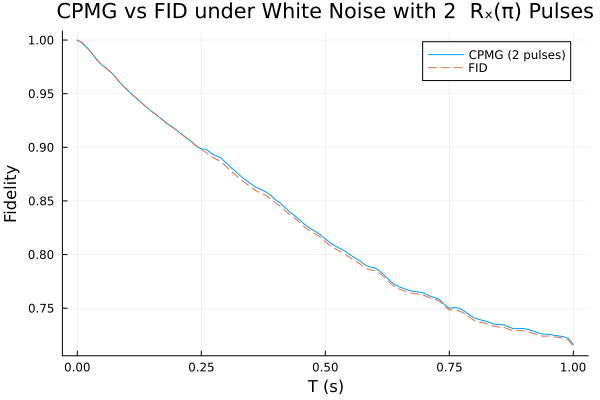

In [3]:
# Plot
using Plots
plot(T_vals_ctrl, avg_fid_ctrl, label="CPMG ($n_pi_pulses pulses)", xlabel="T (s)", ylabel="Fidelity", legend=:topright)
plot!(T_vals, avg_fid, label="FID", linestyle=:dash)
title!("CPMG vs FID under White Noise with $n_pi_pulses  Rₓ(π) Pulses")

┌ Info: Realization 20 complete
└ @ Main.QuantumDD c:\Users\vikra\OneDrive\Desktop\project\src\QuantumDD\coherence.jl:260
┌ Info: Realization 40 complete
└ @ Main.QuantumDD c:\Users\vikra\OneDrive\Desktop\project\src\QuantumDD\coherence.jl:260
┌ Info: Realization 60 complete
└ @ Main.QuantumDD c:\Users\vikra\OneDrive\Desktop\project\src\QuantumDD\coherence.jl:260
┌ Info: Realization 80 complete
└ @ Main.QuantumDD c:\Users\vikra\OneDrive\Desktop\project\src\QuantumDD\coherence.jl:260
┌ Info: Realization 100 complete
└ @ Main.QuantumDD c:\Users\vikra\OneDrive\Desktop\project\src\QuantumDD\coherence.jl:260
┌ Info: Realization 120 complete
└ @ Main.QuantumDD c:\Users\vikra\OneDrive\Desktop\project\src\QuantumDD\coherence.jl:260
┌ Info: Realization 140 complete
└ @ Main.QuantumDD c:\Users\vikra\OneDrive\Desktop\project\src\QuantumDD\coherence.jl:260
┌ Info: Realization 160 complete
└ @ Main.QuantumDD c:\Users\vikra\OneDrive\Desktop\project\src\QuantumDD\coherence.jl:260
┌ Info: Realization 

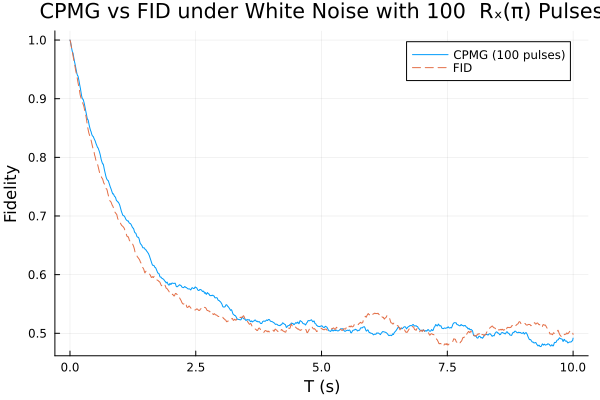

In [4]:
# Parameters
sequence = "CPMG"
T_max = 10.0
n_pi_pulses = 100
n_realizations = 1000
dt = 0.01
pulse_duration =  dt
σ = 0.2  # Standard deviation for Gaussian noise
pulse_shape = "square"  # or "gaussian"
# Make CPMG control terms
control_terms = make_control_terms(sequence, T_max, n_pi_pulses;
                                   pulse_duration=pulse_duration,
                                   shape=pulse_shape,
                                   axis=:x,
                                   pulse_amplitude=π,
                                   center_pulse=true)
ψ₀ = normalize(basis(2, 0) + basis(2, 1))

# Example white noise spectral density
parameters = get_preset_params("white")
S_func = ω -> S(ω; parameters...)

T_vals, avg_fid = simulate_modulated_noise_fidelity(
    ψ₀ = ψ₀,
    T_max = T_max,
    dt = dt,
    target_std = σ,
    n_realizations = n_realizations,
    S_func = S_func,
)

# Actual simulation with control
T_vals_ctrl, avg_fid_ctrl = simulate_shaped_control_fidelity(
    ψ₀ = ψ₀,
    T_max = T_max,
    dt = dt,
    target_std = σ,
    n_realizations = n_realizations,
    S_func_z = S_func,
    control_terms = control_terms
    )
# Plot
using Plots
plot(T_vals_ctrl, avg_fid_ctrl, label="CPMG ($n_pi_pulses pulses)", xlabel="T (s)", ylabel="Fidelity", legend=:topright)
plot!(T_vals, avg_fid, label="FID", linestyle=:dash)
title!("CPMG vs FID under White Noise with $n_pi_pulses  Rₓ(π) Pulses")

┌ Info: Realization 20 complete
└ @ Main.QuantumDD c:\Users\vikra\OneDrive\Desktop\project\src\QuantumDD\coherence.jl:260
┌ Info: Realization 40 complete
└ @ Main.QuantumDD c:\Users\vikra\OneDrive\Desktop\project\src\QuantumDD\coherence.jl:260
┌ Info: Realization 60 complete
└ @ Main.QuantumDD c:\Users\vikra\OneDrive\Desktop\project\src\QuantumDD\coherence.jl:260
┌ Info: Realization 80 complete
└ @ Main.QuantumDD c:\Users\vikra\OneDrive\Desktop\project\src\QuantumDD\coherence.jl:260
┌ Info: Realization 100 complete
└ @ Main.QuantumDD c:\Users\vikra\OneDrive\Desktop\project\src\QuantumDD\coherence.jl:260
┌ Info: Realization 120 complete
└ @ Main.QuantumDD c:\Users\vikra\OneDrive\Desktop\project\src\QuantumDD\coherence.jl:260
┌ Info: Realization 140 complete
└ @ Main.QuantumDD c:\Users\vikra\OneDrive\Desktop\project\src\QuantumDD\coherence.jl:260
┌ Info: Realization 160 complete
└ @ Main.QuantumDD c:\Users\vikra\OneDrive\Desktop\project\src\QuantumDD\coherence.jl:260
┌ Info: Realization 

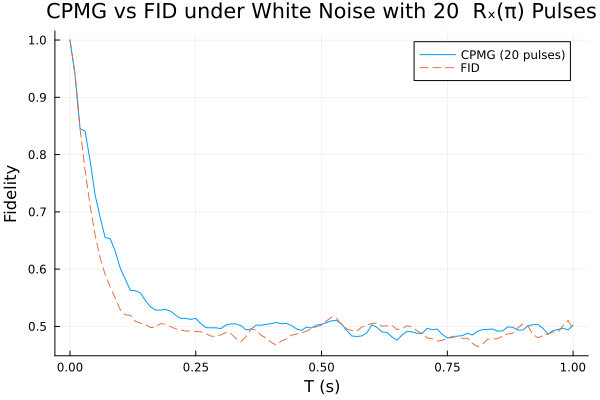

In [5]:
# Parameters
sequence = "CPMG"
T_max = 1.0
n_pi_pulses = 20
n_realizations = 1000
dt = 0.01
pulse_duration =  dt
σ = 1  # Standard deviation for Gaussian noise
pulse_shape = "square"  # or "gaussian"
# Make CPMG control terms
control_terms = make_control_terms(sequence, T_max, n_pi_pulses;
                                   pulse_duration=pulse_duration,
                                   shape=pulse_shape,
                                   axis=:x,
                                   pulse_amplitude=π,
                                   center_pulse=true)
ψ₀ = normalize(basis(2, 0) + basis(2, 1))

# Example white noise spectral density
parameters = get_preset_params("white")
S_func = ω -> S(ω; parameters...)

T_vals, avg_fid = simulate_modulated_noise_fidelity(
    ψ₀ = ψ₀,
    T_max = T_max,
    dt = dt,
    target_std = σ,
    n_realizations = n_realizations,
    S_func = S_func,
)

# Actual simulation with control
T_vals_ctrl, avg_fid_ctrl = simulate_shaped_control_fidelity(
    ψ₀ = ψ₀,
    T_max = T_max,
    dt = dt,
    target_std = σ,
    n_realizations = n_realizations,
    S_func_z = S_func,
    control_terms = control_terms
    )
# Plot
using Plots
plot(T_vals_ctrl, avg_fid_ctrl, label="CPMG ($n_pi_pulses pulses)", xlabel="T (s)", ylabel="Fidelity", legend=:topright)
plot!(T_vals, avg_fid, label="FID", linestyle=:dash)
title!("CPMG vs FID under White Noise with $n_pi_pulses  Rₓ(π) Pulses")

┌ Info: Realization 20 complete
└ @ Main.QuantumDD c:\Users\vikra\OneDrive\Desktop\project\src\QuantumDD\coherence.jl:260
┌ Info: Realization 40 complete
└ @ Main.QuantumDD c:\Users\vikra\OneDrive\Desktop\project\src\QuantumDD\coherence.jl:260
┌ Info: Realization 60 complete
└ @ Main.QuantumDD c:\Users\vikra\OneDrive\Desktop\project\src\QuantumDD\coherence.jl:260
┌ Info: Realization 80 complete
└ @ Main.QuantumDD c:\Users\vikra\OneDrive\Desktop\project\src\QuantumDD\coherence.jl:260
┌ Info: Realization 100 complete
└ @ Main.QuantumDD c:\Users\vikra\OneDrive\Desktop\project\src\QuantumDD\coherence.jl:260
┌ Info: Realization 120 complete
└ @ Main.QuantumDD c:\Users\vikra\OneDrive\Desktop\project\src\QuantumDD\coherence.jl:260
┌ Info: Realization 140 complete
└ @ Main.QuantumDD c:\Users\vikra\OneDrive\Desktop\project\src\QuantumDD\coherence.jl:260
┌ Info: Realization 160 complete
└ @ Main.QuantumDD c:\Users\vikra\OneDrive\Desktop\project\src\QuantumDD\coherence.jl:260
┌ Info: Realization 

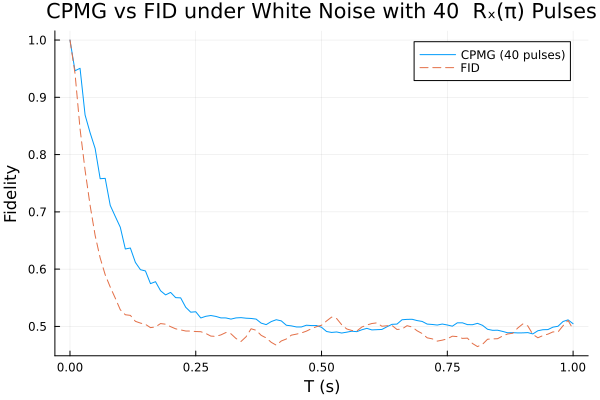

In [6]:
# Parameters
sequence = "CPMG"
T_max = 1.0
n_pi_pulses = 40
n_realizations = 1000
dt = 0.01
pulse_duration =  dt
σ = 1  # Standard deviation for Gaussian noise
pulse_shape = "square"  # or "gaussian"
# Make CPMG control terms
control_terms = make_control_terms(sequence, T_max, n_pi_pulses;
                                   pulse_duration=pulse_duration,
                                   shape=pulse_shape,
                                   axis=:x,
                                   pulse_amplitude=π,
                                   center_pulse=true)
ψ₀ = normalize(basis(2, 0) + basis(2, 1))

# Example white noise spectral density
parameters = get_preset_params("white")
S_func = ω -> S(ω; parameters...)

T_vals, avg_fid = simulate_modulated_noise_fidelity(
    ψ₀ = ψ₀,
    T_max = T_max,
    dt = dt,
    target_std = σ,
    n_realizations = n_realizations,
    S_func = S_func,
)

# Actual simulation with control
T_vals_ctrl, avg_fid_ctrl = simulate_shaped_control_fidelity(
    ψ₀ = ψ₀,
    T_max = T_max,
    dt = dt,
    target_std = σ,
    n_realizations = n_realizations,
    S_func_z = S_func,
    control_terms = control_terms
    )
# Plot
using Plots
plot(T_vals_ctrl, avg_fid_ctrl, label="CPMG ($n_pi_pulses pulses)", xlabel="T (s)", ylabel="Fidelity", legend=:topright)
plot!(T_vals, avg_fid, label="FID", linestyle=:dash)
title!("CPMG vs FID under White Noise with $n_pi_pulses  Rₓ(π) Pulses")

┌ Info: Realization 20 complete
└ @ Main.QuantumDD c:\Users\vikra\OneDrive\Desktop\project\src\QuantumDD\coherence.jl:260
┌ Info: Realization 40 complete
└ @ Main.QuantumDD c:\Users\vikra\OneDrive\Desktop\project\src\QuantumDD\coherence.jl:260
┌ Info: Realization 60 complete
└ @ Main.QuantumDD c:\Users\vikra\OneDrive\Desktop\project\src\QuantumDD\coherence.jl:260
┌ Info: Realization 80 complete
└ @ Main.QuantumDD c:\Users\vikra\OneDrive\Desktop\project\src\QuantumDD\coherence.jl:260
┌ Info: Realization 100 complete
└ @ Main.QuantumDD c:\Users\vikra\OneDrive\Desktop\project\src\QuantumDD\coherence.jl:260
┌ Info: Realization 120 complete
└ @ Main.QuantumDD c:\Users\vikra\OneDrive\Desktop\project\src\QuantumDD\coherence.jl:260
┌ Info: Realization 140 complete
└ @ Main.QuantumDD c:\Users\vikra\OneDrive\Desktop\project\src\QuantumDD\coherence.jl:260
┌ Info: Realization 160 complete
└ @ Main.QuantumDD c:\Users\vikra\OneDrive\Desktop\project\src\QuantumDD\coherence.jl:260
┌ Info: Realization 

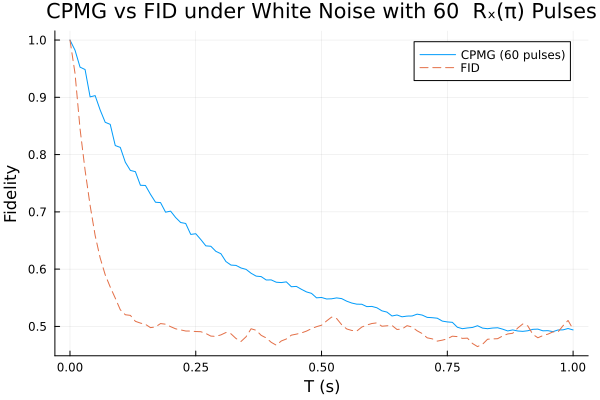

In [7]:
# Parameters
sequence = "CPMG"
T_max = 1.0
n_pi_pulses = 60
n_realizations = 1000
dt = 0.01
pulse_duration =  dt
σ = 1  # Standard deviation for Gaussian noise
pulse_shape = "square"  # or "gaussian"
# Make CPMG control terms
control_terms = make_control_terms(sequence, T_max, n_pi_pulses;
                                   pulse_duration=pulse_duration,
                                   shape=pulse_shape,
                                   axis=:x,
                                   pulse_amplitude=π,
                                   center_pulse=true)
ψ₀ = normalize(basis(2, 0) + basis(2, 1))

# Example white noise spectral density
parameters = get_preset_params("white")
S_func = ω -> S(ω; parameters...)

T_vals, avg_fid = simulate_modulated_noise_fidelity(
    ψ₀ = ψ₀,
    T_max = T_max,
    dt = dt,
    target_std = σ,
    n_realizations = n_realizations,
    S_func = S_func,
)

# Actual simulation with control
T_vals_ctrl, avg_fid_ctrl = simulate_shaped_control_fidelity(
    ψ₀ = ψ₀,
    T_max = T_max,
    dt = dt,
    target_std = σ,
    n_realizations = n_realizations,
    S_func_z = S_func,
    control_terms = control_terms
    )
# Plot
using Plots
plot(T_vals_ctrl, avg_fid_ctrl, label="CPMG ($n_pi_pulses pulses)", xlabel="T (s)", ylabel="Fidelity", legend=:topright)
plot!(T_vals, avg_fid, label="FID", linestyle=:dash)
title!("CPMG vs FID under White Noise with $n_pi_pulses  Rₓ(π) Pulses")

┌ Info: Realization 20 complete
└ @ Main.QuantumDD c:\Users\vikra\OneDrive\Desktop\project\src\QuantumDD\coherence.jl:260
┌ Info: Realization 40 complete
└ @ Main.QuantumDD c:\Users\vikra\OneDrive\Desktop\project\src\QuantumDD\coherence.jl:260
┌ Info: Realization 60 complete
└ @ Main.QuantumDD c:\Users\vikra\OneDrive\Desktop\project\src\QuantumDD\coherence.jl:260
┌ Info: Realization 80 complete
└ @ Main.QuantumDD c:\Users\vikra\OneDrive\Desktop\project\src\QuantumDD\coherence.jl:260
┌ Info: Realization 100 complete
└ @ Main.QuantumDD c:\Users\vikra\OneDrive\Desktop\project\src\QuantumDD\coherence.jl:260
┌ Info: Realization 120 complete
└ @ Main.QuantumDD c:\Users\vikra\OneDrive\Desktop\project\src\QuantumDD\coherence.jl:260
┌ Info: Realization 140 complete
└ @ Main.QuantumDD c:\Users\vikra\OneDrive\Desktop\project\src\QuantumDD\coherence.jl:260
┌ Info: Realization 160 complete
└ @ Main.QuantumDD c:\Users\vikra\OneDrive\Desktop\project\src\QuantumDD\coherence.jl:260
┌ Info: Realization 

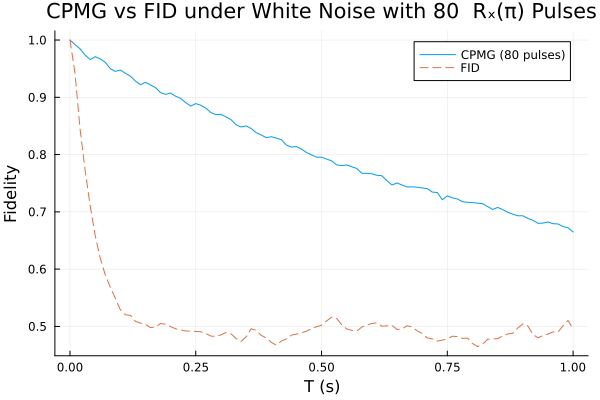

In [8]:
# Parameters
sequence = "CPMG"
T_max = 1.0
n_pi_pulses = 80
n_realizations = 1000
dt = 0.01
pulse_duration =  dt
σ = 1  # Standard deviation for Gaussian noise
pulse_shape = "square"  # or "gaussian"
# Make CPMG control terms
control_terms = make_control_terms(sequence, T_max, n_pi_pulses;
                                   pulse_duration=pulse_duration,
                                   shape=pulse_shape,
                                   axis=:x,
                                   pulse_amplitude=π,
                                   center_pulse=true)
ψ₀ = normalize(basis(2, 0) + basis(2, 1))

# Example white noise spectral density
parameters = get_preset_params("white")
S_func = ω -> S(ω; parameters...)

T_vals, avg_fid = simulate_modulated_noise_fidelity(
    ψ₀ = ψ₀,
    T_max = T_max,
    dt = dt,
    target_std = σ,
    n_realizations = n_realizations,
    S_func = S_func,
)

# Actual simulation with control
T_vals_ctrl, avg_fid_ctrl = simulate_shaped_control_fidelity(
    ψ₀ = ψ₀,
    T_max = T_max,
    dt = dt,
    target_std = σ,
    n_realizations = n_realizations,
    S_func_z = S_func,
    control_terms = control_terms
    )
# Plot
using Plots
plot(T_vals_ctrl, avg_fid_ctrl, label="CPMG ($n_pi_pulses pulses)", xlabel="T (s)", ylabel="Fidelity", legend=:topright)
plot!(T_vals, avg_fid, label="FID", linestyle=:dash)
title!("CPMG vs FID under White Noise with $n_pi_pulses  Rₓ(π) Pulses")

┌ Info: Realization 20 complete
└ @ Main.QuantumDD c:\Users\vikra\OneDrive\Desktop\project\src\QuantumDD\coherence.jl:260
┌ Info: Realization 40 complete
└ @ Main.QuantumDD c:\Users\vikra\OneDrive\Desktop\project\src\QuantumDD\coherence.jl:260
┌ Info: Realization 60 complete
└ @ Main.QuantumDD c:\Users\vikra\OneDrive\Desktop\project\src\QuantumDD\coherence.jl:260
┌ Info: Realization 80 complete
└ @ Main.QuantumDD c:\Users\vikra\OneDrive\Desktop\project\src\QuantumDD\coherence.jl:260
┌ Info: Realization 100 complete
└ @ Main.QuantumDD c:\Users\vikra\OneDrive\Desktop\project\src\QuantumDD\coherence.jl:260
┌ Info: Realization 120 complete
└ @ Main.QuantumDD c:\Users\vikra\OneDrive\Desktop\project\src\QuantumDD\coherence.jl:260
┌ Info: Realization 140 complete
└ @ Main.QuantumDD c:\Users\vikra\OneDrive\Desktop\project\src\QuantumDD\coherence.jl:260
┌ Info: Realization 160 complete
└ @ Main.QuantumDD c:\Users\vikra\OneDrive\Desktop\project\src\QuantumDD\coherence.jl:260
┌ Info: Realization 

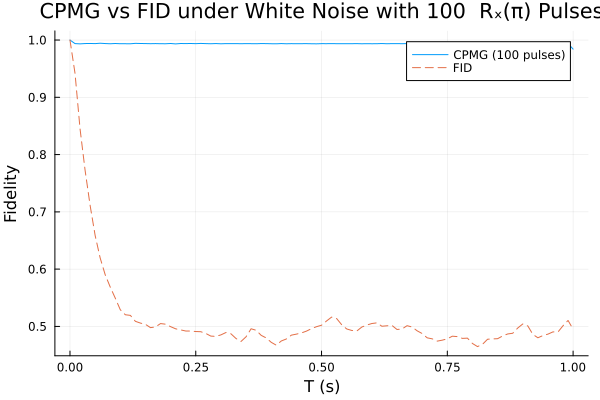

In [9]:
# Parameters
sequence = "CPMG"
T_max = 1.0
n_pi_pulses = 100
n_realizations = 1000
dt = 0.01
pulse_duration =  dt
σ = 1  # Standard deviation for Gaussian noise
pulse_shape = "square"  # or "gaussian"
# Make CPMG control terms
control_terms = make_control_terms(sequence, T_max, n_pi_pulses;
                                   pulse_duration=pulse_duration,
                                   shape=pulse_shape,
                                   axis=:x,
                                   pulse_amplitude=π,
                                   center_pulse=true)
ψ₀ = normalize(basis(2, 0) + basis(2, 1))

# Example white noise spectral density
parameters = get_preset_params("white")
S_func = ω -> S(ω; parameters...)

T_vals, avg_fid = simulate_modulated_noise_fidelity(
    ψ₀ = ψ₀,
    T_max = T_max,
    dt = dt,
    target_std = σ,
    n_realizations = n_realizations,
    S_func = S_func,
)

# Actual simulation with control
T_vals_ctrl, avg_fid_ctrl = simulate_shaped_control_fidelity(
    ψ₀ = ψ₀,
    T_max = T_max,
    dt = dt,
    target_std = σ,
    n_realizations = n_realizations,
    S_func_z = S_func,
    control_terms = control_terms
    )
# Plot
using Plots
plot(T_vals_ctrl, avg_fid_ctrl, label="CPMG ($n_pi_pulses pulses)", xlabel="T (s)", ylabel="Fidelity", legend=:topright)
plot!(T_vals, avg_fid, label="FID", linestyle=:dash)
title!("CPMG vs FID under White Noise with $n_pi_pulses  Rₓ(π) Pulses")

┌ Info: Realization 20 complete
└ @ Main.QuantumDD c:\Users\vikra\OneDrive\Desktop\project\src\QuantumDD\coherence.jl:260
┌ Info: Realization 40 complete
└ @ Main.QuantumDD c:\Users\vikra\OneDrive\Desktop\project\src\QuantumDD\coherence.jl:260
┌ Info: Realization 60 complete
└ @ Main.QuantumDD c:\Users\vikra\OneDrive\Desktop\project\src\QuantumDD\coherence.jl:260
┌ Info: Realization 80 complete
└ @ Main.QuantumDD c:\Users\vikra\OneDrive\Desktop\project\src\QuantumDD\coherence.jl:260
┌ Info: Realization 100 complete
└ @ Main.QuantumDD c:\Users\vikra\OneDrive\Desktop\project\src\QuantumDD\coherence.jl:260
┌ Info: Realization 120 complete
└ @ Main.QuantumDD c:\Users\vikra\OneDrive\Desktop\project\src\QuantumDD\coherence.jl:260
┌ Info: Realization 140 complete
└ @ Main.QuantumDD c:\Users\vikra\OneDrive\Desktop\project\src\QuantumDD\coherence.jl:260
┌ Info: Realization 160 complete
└ @ Main.QuantumDD c:\Users\vikra\OneDrive\Desktop\project\src\QuantumDD\coherence.jl:260
┌ Info: Realization 

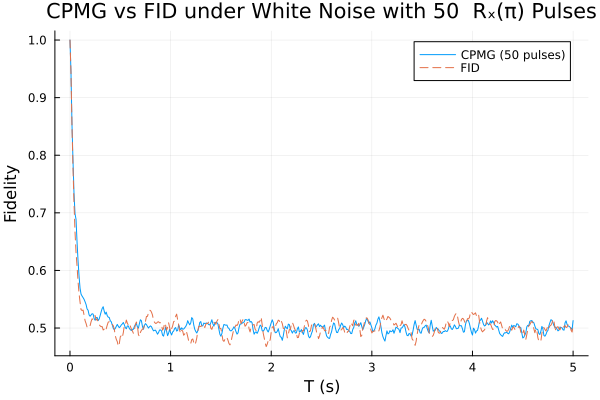

In [10]:
# Parameters
sequence = "CPMG"
T_max = 5.0
n_pi_pulses = 50
n_realizations = 1000
dt = 0.01
pulse_duration =  dt
σ = 1  # Standard deviation for Gaussian noise
pulse_shape = "square"  # or "gaussian"
# Make CPMG control terms
control_terms = make_control_terms(sequence, T_max, n_pi_pulses;
                                   pulse_duration=pulse_duration,
                                   shape=pulse_shape,
                                   axis=:x,
                                   pulse_amplitude=π,
                                   center_pulse=true)
ψ₀ = normalize(basis(2, 0) + basis(2, 1))

# Example white noise spectral density
parameters = get_preset_params("white")
S_func = ω -> S(ω; parameters...)

T_vals, avg_fid = simulate_modulated_noise_fidelity(
    ψ₀ = ψ₀,
    T_max = T_max,
    dt = dt,
    target_std = σ,
    n_realizations = n_realizations,
    S_func = S_func,
)

# Actual simulation with control
T_vals_ctrl, avg_fid_ctrl = simulate_shaped_control_fidelity(
    ψ₀ = ψ₀,
    T_max = T_max,
    dt = dt,
    target_std = σ,
    n_realizations = n_realizations,
    S_func_z = S_func,
    control_terms = control_terms
    )
# Plot
using Plots
plot(T_vals_ctrl, avg_fid_ctrl, label="CPMG ($n_pi_pulses pulses)", xlabel="T (s)", ylabel="Fidelity", legend=:topright)
plot!(T_vals, avg_fid, label="FID", linestyle=:dash)
title!("CPMG vs FID under White Noise with $n_pi_pulses  Rₓ(π) Pulses")

┌ Info: Realization 20 complete
└ @ Main.QuantumDD c:\Users\vikra\OneDrive\Desktop\project\src\QuantumDD\coherence.jl:260
┌ Info: Realization 40 complete
└ @ Main.QuantumDD c:\Users\vikra\OneDrive\Desktop\project\src\QuantumDD\coherence.jl:260
┌ Info: Realization 60 complete
└ @ Main.QuantumDD c:\Users\vikra\OneDrive\Desktop\project\src\QuantumDD\coherence.jl:260
┌ Info: Realization 80 complete
└ @ Main.QuantumDD c:\Users\vikra\OneDrive\Desktop\project\src\QuantumDD\coherence.jl:260
┌ Info: Realization 100 complete
└ @ Main.QuantumDD c:\Users\vikra\OneDrive\Desktop\project\src\QuantumDD\coherence.jl:260
┌ Info: Realization 120 complete
└ @ Main.QuantumDD c:\Users\vikra\OneDrive\Desktop\project\src\QuantumDD\coherence.jl:260
┌ Info: Realization 140 complete
└ @ Main.QuantumDD c:\Users\vikra\OneDrive\Desktop\project\src\QuantumDD\coherence.jl:260
┌ Info: Realization 160 complete
└ @ Main.QuantumDD c:\Users\vikra\OneDrive\Desktop\project\src\QuantumDD\coherence.jl:260
┌ Info: Realization 

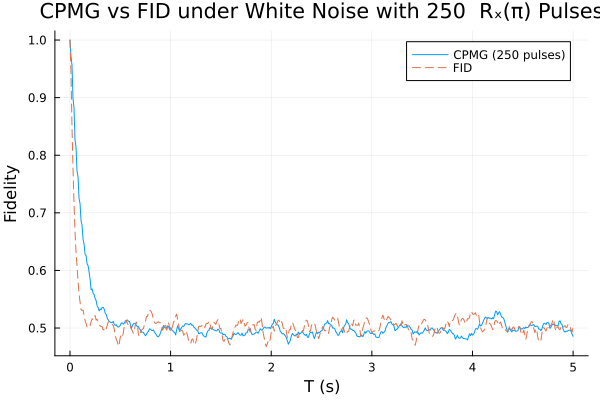

In [11]:
# Parameters
sequence = "CPMG"
T_max = 5.0
n_pi_pulses = 250
n_realizations = 1000
dt = 0.01
pulse_duration =  dt
σ = 1  # Standard deviation for Gaussian noise
pulse_shape = "square"  # or "gaussian"
# Make CPMG control terms
control_terms = make_control_terms(sequence, T_max, n_pi_pulses;
                                   pulse_duration=pulse_duration,
                                   shape=pulse_shape,
                                   axis=:x,
                                   pulse_amplitude=π,
                                   center_pulse=true)
ψ₀ = normalize(basis(2, 0) + basis(2, 1))

# Example white noise spectral density
parameters = get_preset_params("white")
S_func = ω -> S(ω; parameters...)

T_vals, avg_fid = simulate_modulated_noise_fidelity(
    ψ₀ = ψ₀,
    T_max = T_max,
    dt = dt,
    target_std = σ,
    n_realizations = n_realizations,
    S_func = S_func,
)

# Actual simulation with control
T_vals_ctrl, avg_fid_ctrl = simulate_shaped_control_fidelity(
    ψ₀ = ψ₀,
    T_max = T_max,
    dt = dt,
    target_std = σ,
    n_realizations = n_realizations,
    S_func_z = S_func,
    control_terms = control_terms
    )
# Plot
using Plots
plot(T_vals_ctrl, avg_fid_ctrl, label="CPMG ($n_pi_pulses pulses)", xlabel="T (s)", ylabel="Fidelity", legend=:topright)
plot!(T_vals, avg_fid, label="FID", linestyle=:dash)
title!("CPMG vs FID under White Noise with $n_pi_pulses  Rₓ(π) Pulses")

┌ Info: Realization 20 complete
└ @ Main.QuantumDD c:\Users\vikra\OneDrive\Desktop\project\src\QuantumDD\coherence.jl:260
┌ Info: Realization 40 complete
└ @ Main.QuantumDD c:\Users\vikra\OneDrive\Desktop\project\src\QuantumDD\coherence.jl:260
┌ Info: Realization 60 complete
└ @ Main.QuantumDD c:\Users\vikra\OneDrive\Desktop\project\src\QuantumDD\coherence.jl:260
┌ Info: Realization 80 complete
└ @ Main.QuantumDD c:\Users\vikra\OneDrive\Desktop\project\src\QuantumDD\coherence.jl:260
┌ Info: Realization 100 complete
└ @ Main.QuantumDD c:\Users\vikra\OneDrive\Desktop\project\src\QuantumDD\coherence.jl:260
┌ Info: Realization 120 complete
└ @ Main.QuantumDD c:\Users\vikra\OneDrive\Desktop\project\src\QuantumDD\coherence.jl:260
┌ Info: Realization 140 complete
└ @ Main.QuantumDD c:\Users\vikra\OneDrive\Desktop\project\src\QuantumDD\coherence.jl:260
┌ Info: Realization 160 complete
└ @ Main.QuantumDD c:\Users\vikra\OneDrive\Desktop\project\src\QuantumDD\coherence.jl:260
┌ Info: Realization 

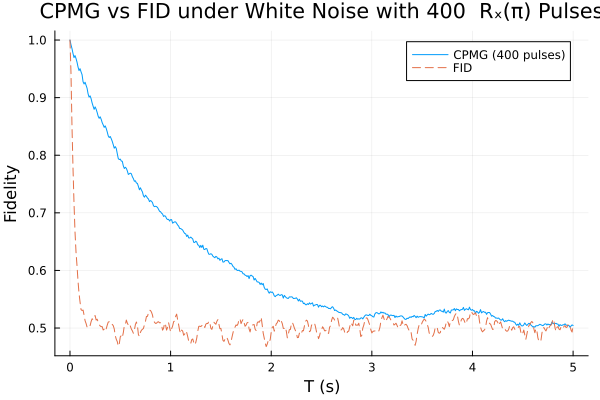

In [2]:
# Parameters
sequence = "CPMG"
T_max = 5.0
n_pi_pulses = 400
n_realizations = 1000
dt = 0.01
pulse_duration =  dt
σ = 1  # Standard deviation for Gaussian noise
pulse_shape = "square"  # or "gaussian"
# Make CPMG control terms
control_terms = make_control_terms(sequence, T_max, n_pi_pulses;
                                   pulse_duration=pulse_duration,
                                   shape=pulse_shape,
                                   axis=:x,
                                   pulse_amplitude=π,
                                   center_pulse=true)
ψ₀ = normalize(basis(2, 0) + basis(2, 1))

# Example white noise spectral density
parameters = get_preset_params("white")
S_func = ω -> S(ω; parameters...)

T_vals, avg_fid = simulate_modulated_noise_fidelity(
    ψ₀ = ψ₀,
    T_max = T_max,
    dt = dt,
    target_std = σ,
    n_realizations = n_realizations,
    S_func = S_func,
)

# Actual simulation with control
T_vals_ctrl, avg_fid_ctrl = simulate_shaped_control_fidelity(
    ψ₀ = ψ₀,
    T_max = T_max,
    dt = dt,
    target_std = σ,
    n_realizations = n_realizations,
    S_func_z = S_func,
    control_terms = control_terms
    )
# Plot
using Plots
plot(T_vals_ctrl, avg_fid_ctrl, label="CPMG ($n_pi_pulses pulses)", xlabel="T (s)", ylabel="Fidelity", legend=:topright)
plot!(T_vals, avg_fid, label="FID", linestyle=:dash)
title!("CPMG vs FID under White Noise with $n_pi_pulses  Rₓ(π) Pulses")

┌ Info: Realization 20 complete
└ @ Main.QuantumDD c:\Users\vikra\OneDrive\Desktop\project\src\QuantumDD\coherence.jl:260
┌ Info: Realization 40 complete
└ @ Main.QuantumDD c:\Users\vikra\OneDrive\Desktop\project\src\QuantumDD\coherence.jl:260
┌ Info: Realization 60 complete
└ @ Main.QuantumDD c:\Users\vikra\OneDrive\Desktop\project\src\QuantumDD\coherence.jl:260
┌ Info: Realization 80 complete
└ @ Main.QuantumDD c:\Users\vikra\OneDrive\Desktop\project\src\QuantumDD\coherence.jl:260
┌ Info: Realization 100 complete
└ @ Main.QuantumDD c:\Users\vikra\OneDrive\Desktop\project\src\QuantumDD\coherence.jl:260
┌ Info: Realization 120 complete
└ @ Main.QuantumDD c:\Users\vikra\OneDrive\Desktop\project\src\QuantumDD\coherence.jl:260
┌ Info: Realization 140 complete
└ @ Main.QuantumDD c:\Users\vikra\OneDrive\Desktop\project\src\QuantumDD\coherence.jl:260
┌ Info: Realization 160 complete
└ @ Main.QuantumDD c:\Users\vikra\OneDrive\Desktop\project\src\QuantumDD\coherence.jl:260
┌ Info: Realization 

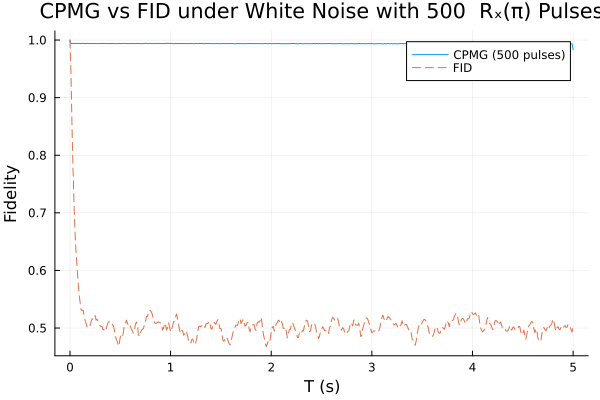

In [ ]:
# Parameters
sequence = "CPMG"
T_max = 5.0
n_pi_pulses = 500
n_realizations = 1000
dt = 0.01
pulse_duration =  dt
σ = 1  # Standard deviation for Gaussian noise
pulse_shape = "square"  # or "gaussian"
# Make CPMG control terms
control_terms = make_control_terms(sequence, T_max, n_pi_pulses;
                                   pulse_duration=pulse_duration,
                                   shape=pulse_shape,
                                   axis=:x,
                                   pulse_amplitude=π,
                                   center_pulse=true)
ψ₀ = normalize(basis(2, 0) + basis(2, 1))

# Example white noise spectral density
parameters = get_preset_params("white")
S_func = ω -> S(ω; parameters...)

T_vals, avg_fid = simulate_modulated_noise_fidelity(
    ψ₀ = ψ₀,
    T_max = T_max,
    dt = dt,
    target_std = σ,
    n_realizations = n_realizations,
    S_func = S_func,
)

# Actual simulation with control
T_vals_ctrl, avg_fid_ctrl = simulate_shaped_control_fidelity(
    ψ₀ = ψ₀,
    T_max = T_max,
    dt = dt,
    target_std = σ,
    n_realizations = n_realizations,
    S_func_z = S_func,
    control_terms = control_terms
    )
# Plot
using Plots
plot(T_vals_ctrl, avg_fid_ctrl, label="CPMG ($n_pi_pulses pulses)", xlabel="T (s)", ylabel="Fidelity", legend=:topright)
plot!(T_vals, avg_fid, label="FID", linestyle=:dash)
title!("CPMG vs FID under White Noise with $n_pi_pulses  Rₓ(π) Pulses") 
; 